In [130]:
import pandas as pd

# Importing queries from BQL Editor:

# (1) Copy as BQL string:

# get(PX_LAST(dates=range(2020-06-03, 2020-06-08), currency=USD), CUR_MKT_CAP(dates=range(-9M, 0D, frqstep=2, frq=D), currency=USD), ID()) 
# for(['DIS US Equity', 'BAC US Equity', 'PETR4 BZ Equity'])

# (2) Copy as BQL object model:

import bql
bq = bql.Service()

bql_item1 = bq.data.px_last(dates=bq.func.range('2020-06-03', '2020-06-08'), currency='USD')
bql_item2 = bq.data.cur_mkt_cap(dates=bq.func.range('-9M', '0D', frqstep=2, frq='D'), currency='USD')
bql_item3 = bq.data.id()
bql_items = [bql_item1, bql_item2, bql_item3]

bql_universe = ['DIS US Equity', 'BAC US Equity', 'PETR4 BZ Equity']

bql_request = bql.Request(bql_universe, bql_items)
bql_response = bq.execute(bql_request)

In [131]:
print(bql_response)

In [132]:
# Converting Response object to a DataFrame:

# Creating individual DataFrames for each item:

# (1) Last Price:

df_main_prices = bql_response[0].df()

# (2) Current Market Capitalization: 

df_main_mkt_cap = bql_response[1].df()

# (3) ID's:

df_main_ids = bql_response[2].df()


In [133]:
# Inspecting DataFrame for Current Market Capitalization: 

df_main_mkt_cap.info()
df_main_mkt_cap.head()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, DIS US Equity to PETR4 BZ Equity
Data columns (total 3 columns):
DATE                                                                          414 non-null datetime64[ns]
CURRENCY                                                                      414 non-null object
CUR_MKT_CAP(currency=CURRENCY.USD,dates=RANGE(-9M,0D,frqstep=2,frq=FRQ.D))    283 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.9+ KB


,DATE,CURRENCY,"CUR_MKT_CAP(currency=CURRENCY.USD,dates=RANGE(-9M,0D,frqstep=2,frq=FRQ.D))"
ID,,,
DIS US Equity,2019-11-05,USD,2.367913e+11
DIS US Equity,2019-11-07,USD,2.395114e+11
DIS US Equity,2019-11-09,USD,NaN
DIS US Equity,2019-11-11,USD,2.463206e+11
DIS US Equity,2019-11-13,USD,2.679011e+11


In [134]:
# Cleaning DataFrame and renaming columns:

df_main_mkt_cap.dropna(inplace=True, axis=0)
df_main_mkt_cap.columns = ['Date', 'Currency', 'Current_Market_Cap']
df_main_mkt_cap.reset_index(inplace=True)

df_main_mkt_cap.head()

,ID,Date,Currency,Current_Market_Cap
0,DIS US Equity,2019-11-05,USD,2.367913e+11
1,DIS US Equity,2019-11-07,USD,2.395114e+11
2,DIS US Equity,2019-11-11,USD,2.463206e+11
3,DIS US Equity,2019-11-13,USD,2.679011e+11
4,DIS US Equity,2019-11-15,USD,2.606055e+11


In [135]:
# Building Final Dataframe:

df_mkt_cap = df_main_mkt_cap.pivot('Date', 'ID', 'Current_Market_Cap')
df_mkt_cap.head()

ID,BAC US Equity,DIS US Equity,PETR4 BZ Equity
Date,,,
2019-11-05,2.952194e+11,2.367913e+11,1.022594e+11
2019-11-07,2.989074e+11,2.395114e+11,1.031965e+11
2019-11-11,2.984577e+11,2.463206e+11,1.006453e+11
2019-11-13,2.949496e+11,2.679011e+11,9.770619e+10
2019-11-15,2.962089e+11,2.606055e+11,NaN


In [136]:
# Plotting using bqviz:

import bqviz as bqv

line_plot = bqv.LinePlot(df_mkt_cap).set_style()
line_plot.show()


GridBox(children=(Figure(animation_duration=500, axes=[Axis(color='white', grid_color='#3c3c3c', grid_lines='d…

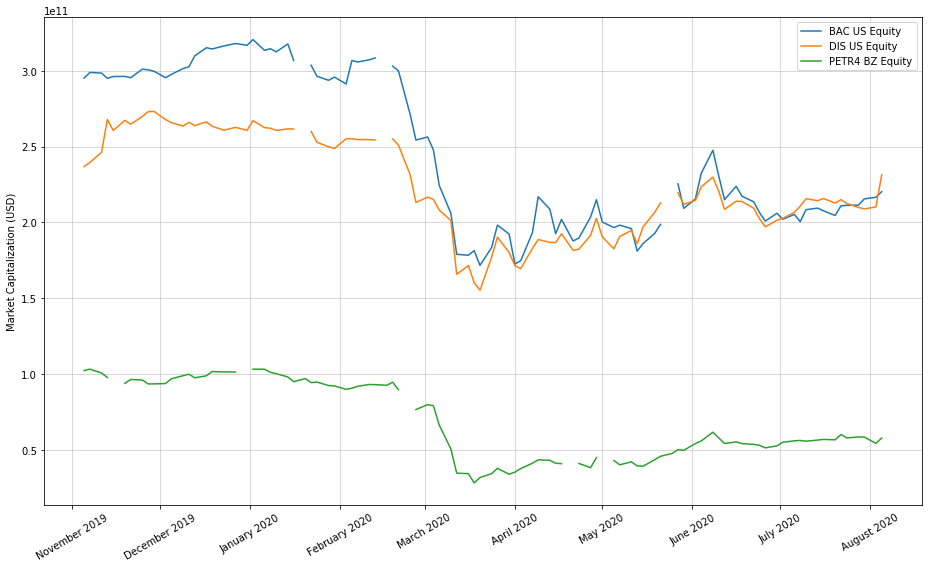

In [137]:
# Plotting with Matplotlib:

import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

plt.figure(figsize=(13, 8))
format = mpl_dates.DateFormatter('%B %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(df_mkt_cap.index, df_mkt_cap)
plt.ylabel('Market Capitalization (USD)')

labels = df_mkt_cap.columns

plt.grid(linewidth=0.5)
plt.legend(labels)
plt.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()


